In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import math

import networkx as nx
%matplotlib inline

# Sites

### All SF attractions (thus far)

fake data

### SF node costs: Fake Data

In [2]:
V = 300 # number of nodes

#### Visit Lengths: visit_lengths

In [3]:
# number of hours needed for visit
visit_lengths = 60*np.random.randint(1,5, size=V)

#### Ticket Prices: ticket_prices

In [4]:
# price for visiting
ticket_prices = np.random.randint(0, 50, size = V)

In [5]:
## later
# open_hours
# events_as_site

#### Site Styles: site_styles

In [6]:
travel_style = ['art', 'history', 'culture' ,'food', 'outdoors', 'adventure']

In [7]:
site_styles = np.random.randint(1,10, size=(V,len(travel_style)))

### SF arc costs -- randomly generated

In [8]:
# Open questions: how would I account for time differences in traveling via bus v. Uber?

#### time per travel leg: travel_times

In [9]:
# V=150 # number of nodes
D = 2 # inherent arc constraints: use this (for now) as a proxy of time needed between 2 graphs

#positions = np.random.rand(V, D)
positions = np.random.randint(2,240, size=(V, D))
differences = positions[:, None, :] - positions[None, :, :]
arc_costs = np.sqrt(np.sum(differences**2, axis=-1))# number of nodes
D = 2 # inherent arc constraints: use this (for now) as a proxy of time needed between 2 graphs

#positions = np.random.rand(V, D)
positions = np.random.randint(2,300, size=(V, D))
differences = positions[:, None, :] - positions[None, :, :]
arc_costs = np.sqrt(np.sum(differences**2, axis=-1))

In [10]:
SF_site_graph = nx.from_numpy_matrix(arc_costs, create_using=nx.DiGraph())

In [11]:
# plt.figure(figsize=(50,20))
# nx.draw(SF_site_graph, node_size=1000)
# plt.show()

In [12]:
travel_times = nx.to_numpy_matrix(SF_site_graph)

#### cost per travel leg: travel_costs

In [13]:
# V = 150 # number of nodes
# D = 2 # inherent arc constraints: use this (for now) as a proxy of cost needed between 2 graphs

#positions = np.random.rand(V, D)
costs = np.random.randint(0,15, size=(V, D))
distances = costs[:, None, :] - costs[None, :, :]
travel_costs = np.sqrt(np.sum(distances**2, axis=-1))

# Users

site preference

### User Profiles: Toy Recommender Generated Data

In [14]:
### 20 users
num_users = 20

#### NO NEED TO USE: Travel Style: style_df

In [15]:
# same as site style -> travel_style = ['art', 'history', 'culture' ,'food', 'outdoors', 'adventure']

In [16]:
style_dict={}
for i in range(num_users):
    style_dict[f'user{i}'] = np.random.randint(1,10, len(travel_style))

In [17]:
style_df = pd.DataFrame(style_dict).T
style_df.head()

,0,1,2,3,4,5
user0,1,6,3,3,1,7
user1,1,4,2,6,3,6
user2,6,2,8,3,1,4
user3,9,5,7,7,5,3
user4,3,1,8,9,9,1


#### BETWEEN 0 AND 5: Site Preferences: preference_df

In [18]:
preference_dict={}
for i in range(num_users):
    preference_dict[f'user{i}'] = np.random.uniform(0,5, V)

In [19]:
preference_df = pd.DataFrame(preference_dict).T
preference_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
user0,3.760771,3.907064,4.701499,3.609411,0.921030,4.535229,1.874039,2.712100,2.612060,0.068639,...,2.873240,1.171965,4.500056,1.670869,3.550218,0.565734,3.842073,0.393369,2.464281,3.769637
user1,1.204822,0.124251,4.668479,1.893819,1.072122,4.642573,4.591809,4.704462,3.388338,1.873523,...,2.085248,3.915077,3.897259,4.638688,2.909639,4.345372,2.076959,0.746420,0.924836,3.378603
user2,2.966314,4.439914,0.361543,2.742619,4.882212,0.855549,1.162640,1.877709,2.229157,3.488949,...,1.233448,2.888776,4.309149,1.146193,1.922016,4.016770,3.016144,2.267831,1.602643,4.802567
user3,2.441744,1.619290,1.020616,4.527550,1.681320,3.821492,1.429961,4.596202,4.052731,0.658597,...,1.151034,4.523814,4.744548,4.203767,0.816598,0.486254,4.728707,3.267540,2.593310,1.402114
user4,4.906874,1.342415,4.432359,0.459451,0.089204,0.844059,2.951362,3.234228,4.989341,0.196027,...,3.799618,3.299161,2.884420,0.807441,1.357260,2.591128,1.109488,4.464692,3.042944,0.427729


#### Budget: user_budget

In [20]:
user_budget = np.random.choice(range(2001), size=len(style_dict))

In [21]:
user_budget_df = dict(zip(preference_df.index, user_budget))

# Site and User Joined

#### Highlight Bonus: highlight_bonus

In [22]:
# The highlight reel is the "must-see" sites of SF ranked 
# -by number of reviews (must be within top 10 by reviews)
# -visit duration longer than 
# -must share at least 

In [23]:
highlight_reel = np.random.randint(0,V,10)

In [24]:
highlight_bonuses = np.ones(V)

In [25]:
for highlight in highlight_reel:
    highlight_bonuses[highlight] = 1.25

# Models

### Constraints

#### Tour Times: tour_hours

In [26]:
tour_hours = 60*np.array(range(9, 21))

#### Max Travel Times/ Site to Travel Ratio: site_travel_ratio

In [27]:
# set the max time the party should be traveling between sites to a ratio of hours 
max_travel_time = 3

# OR set the minimum ratio between time at attractions to travel to site to a value
site_travel_ratio = 2

#### User Budget: budget

In [28]:
# budget
# budget = user_budget[user]
#budget = user_budget

#### Already Seen Sites: already_seen

In [29]:
# sites that the visitor has already visited and does NOT want to see again
already_seen = np.random.randint(0,V, 3)

#### Need to See Sites: want_to_see

In [30]:
# sites that the visitor absolutely wants to see
potentials = list(set(range(V)).difference(set(already_seen)))
want_to_see = np.random.choice(potentials, 2, replace=False)

#### "Cost Function": score

The cost function is some sort of connection between user enjoyment (derived from rankings & preferences) and opportunity cost of not going to other sites???.

In [31]:
#trial 1

In [32]:
#### weight = (highlight_bonus*similarity(site_style, user_style)*(visit_length_minutes/ticket_price) - travel_time*travel_cost  

In [33]:
#### greedy algorithms: take things with high score/ cost; high score/ time and put cut-off

#### scheduling algorithms: heuristics 

In [34]:
# similarity = preferences_df[user][site]

# beta_1=1
# beta_2=2

# travel_time = travel_times[site1][site2]

# # cost = travel_costs[site1][site2]

In [35]:
score = highlight_bonus*similarity*visit_length - beta_1*travel_time - beta_2*travel_cost

NameError: name 'highlight_bonus' is not defined

### Pre-Work

#### 2. NOT CURRENTLY USED: Prune graph

In [37]:
travel_times[travel_times<120]

matrix([[ 0.        , 24.04163056, 77.00649323, ..., 33.60059523,
         93.34880824,  0.        ]])

#### 3. Define site clusters

In [38]:
# Other methods to try:
# k-Spanning Tree
# Shared Nearest Neighbor Clustering
# Betweenness Centrality Based
# Highly Connected Components
# Maximal Clique Enumeration
# Kernel k-means

### Final Data Inputs to Model

#### User Data: budget, travel_time

In [39]:
user = np.random.choice(list(preference_df.index))

In [40]:
budget = user_budget_df[user]

In [41]:
tour_length = (max(tour_hours) - min(tour_hours))

#### User-to-Sites Data: potential_sites--list of (id, similarity, highlight_bonus, visit_length, ticket_price, site_style)

In [49]:
similarities = preference_df.loc[user]

In [50]:
All_SF_sites = dict(zip(range(V), list(zip(similarities, highlight_bonuses, visit_lengths, ticket_prices, site_styles))))

In [51]:
SF_sites = {key: value for (key, value) in All_SF_sites.items() if value[0] >= 3}

#### Path Data: travel_matrix

In [52]:
travel_times_df = pd.DataFrame(travel_times)[list(SF_sites.keys())].iloc[list(SF_sites.keys())]
travel_costs_df = pd.DataFrame(travel_costs)[list(SF_sites.keys())].iloc[list(SF_sites.keys())]

In [53]:
travel_matrix = [travel_times_df, travel_costs_df]

### Route-Finding

In [54]:
# similar experiences, different experiences, downweight things that are close in terms of experience 

#### SCORE 

In [44]:
def get_score(potential_sites, attraction_id, current, highlight_bonuses, visit_lengths, travel_times_df, travel_costs_df, B1=1, B2=1):
    score = potential_sites[attraction_id]*highlight_bonuses[attraction_id]*visit_lengths[attraction_id] - B1*travel_times_df[current][attraction_id] - B2*travel_costs_df[current][attraction_id]
    return score

#### 1. Greedy-greedy MSTs

In [ ]:
discrete_budget = np.linspace(25,2000, 399)

In [ ]:
budget_matrix = [0]*len(discrete_budget)

In [ ]:
# Budget optimization

def get_budget_optimized(budget_matrix, budget_limit, site_to_check):
    
    k_0 = budget_matrix[-1]
    k_1 = []
    
    for budget_amount in range(len(budget_matrix)):
        if site_to_check > budget_amount:
            k_1.append(k_0[budget_matrix.index])
        elif new_item['weight'][0] == budget_amount:
            value = max(k_0[weight], new_item['value'][0])
            k_1.append(value)
        elif new_item['weight'][0] < budget_amount:
            leftover_weight = weight - new_item['weight'][0]
            potential_value = k_0[leftover_weight] + new_item['value'][0]
            value = max(k_0[weight], potential_value)
            k_1.append(value)
            
    weight_val.append(k_1)
    
    return weight_val

In [ ]:
budget_matrix = [0]*len(discrete_budget)

In [ ]:
def get_comparison_matrix(weight_val, weight_limit, new_item):
    
    k_0 = weight_val[-1]
    k_1 = []
    
    for weight in range(len(k_0)):
        if new_item['weight'][0] > weight:
            k_1.append(k_0[weight])
        elif new_item['weight'][0] == weight:
            value = max(k_0[weight], new_item['value'][0])
            k_1.append(value)
        elif new_item['weight'][0] < weight:
            leftover_weight = weight - new_item['weight'][0]
            potential_value = k_0[leftover_weight] + new_item['value'][0]
            value = max(k_0[weight], potential_value)
            k_1.append(value)
            
    weight_val.append(k_1)
    
    return weight_val

#### 2. SA

In [45]:
class Path:
    def __init__(self, from_attraction, to_attraction, similarity, highlight_bonus, visit_length, visit_cost):
       
        self.similarity = similarity
        self.highlight_bonus = highlight_bonus
        self.visit_length = visit_length
        self.visit_cost = visit_cost

        self.to_attraction = to_attraction
        self.from_attraction = from_attraction
        self.name = "(" + str(self.from_attraction) + "->" + str(self.to_attraction) + ")"
        
    def travel_time(self, travel_times_df):
        travel_time = travel_times_df[self.from_attraction][self.to_attraction]
        return travel_time
        
    def travel_cost(self, travel_costs_df):
        travel_cost = travel_costs_df[self.from_attraction][self.to_attraction]
        return travel_cost
    
    def score(self, travel_times_df, B1=1, B2=2):
        score = self.highlight_bonus*self.similarity*self.visit_length - self.travel_time(travel_times_df) - self.travel_cost(travel_costs_df)
        return score
    
    def __repr__(self):
        return self.name

In [104]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
        
    def route_fitness(self):
        if self.fitness == 0:
            path_fitness = 0
            for i in range(len(self.route)-1):
                from_attraction = self.route[i]
                to_attraction = self.route[i+1]
                path = Path(from_attraction, to_attraction, SF_sites[to_attraction][0], SF_sites[to_attraction][1], SF_sites[to_attraction][2], SF_sites[to_attraction][3])
                path_fitness += path.score(travel_times_df)
        self.fitness = path_fitness
        return self.fitness

In [105]:
def get_start_and_end(SF_sites):
    sites = list(SF_sites.keys())
    #start = np.random.choice(sites)
    start = 43
    stop = start
    return start, stop

In [106]:
start, stop = get_start_and_end(SF_sites)

In [107]:
def create_initial_route(start, stop, budget, tour_length, SF_sites, travel_matrix):
    sites = list(SF_sites.keys())
    path = [start]
    not_valid = []
    
    o_budget = budget
    o_tour_length = tour_length
    
    while ((budget > 0.1*o_budget) | (tour_length > 0.1*o_tour_length)) & ((budget > 0) & (tour_length > 0)):
        
        if len(path) == 1:
            from_attraction = start
            
        possibilities = list(set(sites).difference(set(path + not_valid + [stop])))
        
        '''if there aren't any options left, break'''
        if len(possibilities) == 0:
                break
        to_attraction = np.random.choice(possibilities)
        
        '''budget - ticket_prices - cost of traveling from location A to location B'''
        budget = budget - SF_sites[to_attraction][3] - travel_matrix[1][from_attraction][to_attraction]
        
        '''tour_length - visit_length - time to travel from location A to location B'''
        tour_length = tour_length - SF_sites[to_attraction][2] - travel_matrix[0][from_attraction][to_attraction]
        
        '''check that there is enough budget/time left to get to get to the stop location'''
        if (budget > travel_matrix[1][to_attraction][stop]) & (tour_length > travel_matrix[0][to_attraction][stop]):
            path.append(to_attraction)
            from_attraction = to_attraction
            
        else:
            '''if not, go back to the drawing board, and add the current site to the discard pile'''
            not_valid.append(to_attraction)
            '''add the budget and time back'''
            budget = budget + SF_sites[to_attraction][3] + travel_matrix[1][from_attraction][to_attraction]
            tour_length = tour_length + SF_sites[to_attraction][2] + travel_matrix[0][from_attraction][to_attraction]
            
    path.append(stop)

    available_budget = budget - travel_matrix[1][path[-1]][stop]
    available_tour_length = tour_length - travel_matrix[0][path[-1]][stop]
    
    score = Fitness(path).route_fitness()
    
    return path, score, [available_budget, available_tour_length]

In [108]:
current_route = create_initial_route(start, stop, budget, tour_length, SF_sites, travel_matrix)

In [123]:
current_route

([43, 61, 58, 75, 43],
 613.5172286409822,
 [991.5222885641867, 3.6421675844009087])

##### STRATEGY: Next SA Move

In [110]:
SF_sites_df = pd.DataFrame.from_dict(SF_sites).T

In [111]:
def get_route_locations(node_index, current_path):
    node = current_path[node_index]
    before_node = current_path[node_index-1]
    after_node = current_path[node_index+1]
    return node, before_node, after_node

In [112]:
def get_available_resources(node, before_node, after_node, current_path, leftover_budget, leftover_tour_length, SF_sites_df, travel_matrix):  
    
    '''add back the cost of travel to the site, travel from the site, and money spent at the site'''
    available_budget = leftover_budget + travel_matrix[1][before_node][node] + travel_matrix[1][node][after_node] + SF_sites_df.loc[node][3]
    
    '''add back the time of travel to the site, travel from the site, and time spent at the site'''
    available_tour_length = leftover_tour_length + travel_matrix[0][before_node][node] + travel_matrix[0][node][after_node] + SF_sites_df.loc[node][2]
    return available_budget, available_tour_length

In [113]:
# def resource_spend(resource_matrix, before_node, after_node, available_budget, cost_series):
#     new_resource_spend = (resource_matrix[before_node] + resource_matrix[after_node]).drop(labels=[before_node, after_node])
#     new_budget = np.array([available_budget]*len(new_resource_spend)) - (cost_series.drop([before_node, after_node])) + new_resource_spend)
#     return new_budget

# def get_neighbors2(node_index, current_path, budget, tour_length, SF_sites_df, travel_matrix):
#     ''' neighbors are any individuals that when inserted for a node, do not exceed the defined cost limits'''
    
#     '''**available resources are the following'''
    
#     '''current_state locations'''
#     node, before_node, after_node = get_route_locations(node_index, current_path)
    
#     '''$ and time resources'''
#     available_budget, available_tour_length = get_available_resources(node, before_node, after_node, current_path, tour_length, SF_sites_df, travel_matrix)
    
#     '''**prune the available total possible solutions to a more workable list'''
    
#     '''remove all node locations that are in the current path'''
#     all_sites = list(SF_sites_df.index)
#     possible_sites = set(all_sites).difference(set(current_path))
    
#     '''**prune: for insertions: remove all node locations that are outside the available budget and tour length'''
#     new_final_budget = resource_spend(travel_matrix[1], before_node, after_node, available_budget, SF_sites_df[3])
    
#     new_final_tour_lengths = resource_spend(travel_matrix[0], before_node, after_node, available_budget, SF_sites_df[2])
    
#     '''check neighbors for viability'''
#     neighbors = new_final_tour_lengths[(new_final_budget >= 0) & (new_final_tour_lengths >= 0) & ((new_final_budget < .15*budget) | (new_final_tour_lengths < .15*tour_length))]
    
#     return neighbors.index
    
    
def get_neighbors(node_index, current_path, leftover_budget, leftover_tour_length, SF_sites_df, travel_matrix):
    ''' neighbors are any individuals that when inserted for a node, do not exceed the defined cost limits'''
    
    '''**available resources are the following'''
    
    '''current_state locations'''
    node, before_node, after_node = get_route_locations(node_index, current_path)
    
    '''$ and time resources'''
    available_budget, available_tour_length = get_available_resources(node, before_node, after_node, current_path, leftover_budget, leftover_tour_length, SF_sites_df, travel_matrix)
    
    '''**prune the available total possible solutions to a more workable list'''
    
    '''remove all node locations that are in the current path'''
    all_sites = list(SF_sites_df.index)
    possible_sites = set(all_sites).difference(set(current_path))
    
    '''**prune: for insertions: remove all node locations that are outside the available budget and tour length'''
 
    new_travel_costs = (travel_matrix[1][before_node] + travel_matrix[1][after_node]).drop(labels=[before_node, node, after_node])
    new_final_budget = np.array([available_budget]*len(new_travel_costs)) - (SF_sites_df[3].drop([before_node, node, after_node]) + new_travel_costs)
    new_final_budget.name = 'final_budget'
    
    new_travel_lengths = (travel_matrix[0][before_node] + travel_matrix[0][after_node]).drop(labels=[before_node, node, after_node])
    new_final_tour_length = np.array([available_tour_length]*len(new_travel_lengths)) - (SF_sites_df[2].drop([before_node, node, after_node]) + new_travel_lengths)
    new_final_tour_length.name = 'final_tour_length'
    
    nodes_to_check = pd.concat([new_final_budget, new_final_tour_length], axis=1)
    
    '''check neighbors for viability'''
    neighbors = nodes_to_check[((nodes_to_check['final_budget'] >= 0) & (nodes_to_check['final_tour_length'] >= 0)) & ((nodes_to_check['final_budget'] < .15*budget) | (nodes_to_check['final_tour_length'] < .15*tour_length))]
    return neighbors.index
    

In [114]:
class get_new_route():
    
    def __init__(self, current_route, budget, tour_length, SF_sites_df, travel_matrix):
        self.name = 'routing'
        
        self.current_route = current_route[0]
        self.score = current_route[1]
        self.o_budget = budget
        self.o_tour_length = tour_length
        self.leftover_budget = current_route[2][0]
        self.leftover_tour_length = current_route[2][1]
        self.SF_sites_df = SF_sites_df
        self.travel_matrix = travel_matrix
        
        self.length = len(current_route[0])
        self.max_loops = self.length
        
    def roulette(self):
        num_options = 0
        if self.length < 4:
            num_options = 2
        else:
            num_options = 3
        
        wait_and_see = np.random.choice(range(num_options)) 
        node_index = np.random.choice(range(1, self.length-1), size=(num_options - 1,), replace=False)
        
        return wait_and_see, node_index
    
    def next_move(self, wait_and_see, node_index):
        if wait_and_see == 0:
            return self.insertion(node_index[0], self.current_route)
        elif wait_and_see == 1:
            return self.deletion(node_index[0], self.current_route)
        elif wait_and_see == 2:
            return self.mutation(node_index, self.current_route)
        
    def get_neighbors(self, node_index, current_route):
        neighbors = get_neighbors(node_index, current_route, self.leftover_budget, self.leftover_tour_length, self.SF_sites_df, self.travel_matrix)
        return neighbors
    
    def insertion(self, node_index, current_route):
        wait_and_see = 0
        neighbors = self.get_neighbors(node_index, current_route)
        
        trials = 0
        while ((len(neighbors) == 0) & (trials < self.max_loops)):
            node_index = np.random.choice(range(1, self.length-1))
            neighbors = self.get_neighbors(node_index, current_route)
            trials += 1
            
        if trials == self.max_loops:
            return current_route
#             wait_and_see, node_index = self.roulette()
#             return self.next_move(wait_and_see, node_index)
        
        neighbor = np.random.choice(neighbors)
        candidate_0 = current_route[:node_index] + [neighbor] + current_route[node_index:]  
        return candidate_0
    
    def deletion(self, node_index, current_route):
        candidate_0 = current_route[:node_index] + current_route[(node_index+1):] 
        return candidate_0
    
    def mutation(self, indices, current_route):
        indices = sorted(indices)
        candidate_0 = current_route
        for index in range(indices[0], indices[1]+1):
            candidate_0 = self.insertion(index, candidate_0)
            candidate_0 = self.deletion((index+1), candidate_0)
        return candidate_0
    
    def get_surviving_candidate(self, node_index, wait_and_see, candidate_0):
        candidate = tag_survival(candidate_0, self.o_budget, self.o_tour_length, self.SF_sites_df, self.travel_matrix)
        trials = 0
        
        while ((candidate == '') & (trials < self.max_loops)):
            wait_and_see, node_index = self.roulette()
            candidate = self.next_move(wait_and_see, node_index)
            candidate = tag_survival(candidate, self.o_budget, self.o_tour_length, self.SF_sites_df, self.travel_matrix)
            trials += 1
        
        if (trials == self.max_loops):
            wait_and_see, node_index = self.roulette()
            candidate = self.next_move(wait_and_see, node_index)
            candidate = self.get_surviving_candidate(node_index, wait_and_see, candidate)

#         new_route = get_new_route(candidate, SF_sites_df, travel_matrix)
#         print(new_route.score)
        return candidate
         

In [115]:
def get_candidate(current_route, budget, tour_length, SF_sites_df, travel_matrix):
    current_route = get_new_route(current_route, budget, tour_length, SF_sites_df, travel_matrix)
    wait_and_see, node_index = route_updates.roulette()
    candidate = route_updates.next_move(wait_and_see, node_index)
    current_route = route_updates.get_surviving_candidate(node_index, wait_and_see, candidate)
    return current_route

In [116]:
def tag_survival(candidate, budget, tour_length, SF_sites_df, travel_matrix):
    o_budget = budget
    o_tour_length = tour_length
    
    for index in range(len(candidate)-1):
        site_A = candidate[index]
        site_B = candidate[index+1]
        
        '''budget - ticket_prices - cost of traveling from location A to location B'''
        budget = budget - SF_sites_df.loc[site_B][3] - travel_matrix[1][site_A][site_B]

        '''tour_length - visit_length - time to travel from location A to location B'''
        tour_length = tour_length - SF_sites_df.loc[site_B][2] - travel_matrix[0][site_A][site_B]
        
        if (budget < 0) | (tour_length < 0):
            return ''
    
    leftover_budget = budget
    leftover_tour_length = tour_length
        
    if ((leftover_budget <= 0.15*o_budget) | (leftover_tour_length <= 0.15*o_tour_length)):
        score = Fitness(candidate).route_fitness()
        return candidate, score, [leftover_budget, leftover_tour_length]
    else:
        return ''



In [117]:
def probability_move(current_path, candidate, temperature):
    
    '''fitness is recorded in <path>[1]'''
    '''if the candidate is better, return a probability of 1 for updating'''
    if (current_path[1] - candidate[1]) < 0.001:
        return 1
    else:
        ''' let the cooling function handle the updating probability'''
        return math.exp(-abs(current_path[1] - candidate[1])/temperature)

In [118]:
def update_path(current_path, candidate, temperature):
    p_prob = probability_move(current_path, candidate, temperature)
    if np.random.random() < p_prob:
        current_path = candidate
        return candidate
    return current_path

In [119]:
def propagate_change(current_route, budget, tour_length, SF_sites, travel_matrix, temperature):
    candidate = get_candidate(current_route, budget, tour_length, SF_sites, travel_matrix)
    updated_route = update_path(current_route, candidate, temperature)
    return updated_route

In [125]:
propagate_change(current_route, budget, tour_length, SF_sites, travel_matrix, 90)

([43, 105, 262, 210, 43],
 1167.3532107670858,
 [975.9870288953833, 41.50468306407883])

In [139]:
def simulated_annealing_plot(budget, tour_length, SF_sites, travel_matrix, temperature=100, stopping_temperature=0.00000001, max_iterations=10000, alpha=0.995):
    np.random.seed(52)
    iteration = 1

    start, stop = get_start_and_end(SF_sites)
    
    '''create an initial route'''
    current_route = create_initial_route(start, stop, budget, tour_length, SF_sites, travel_matrix)

    progress = []
    routes = []
    
    '''keep track of score from initial selection'''
    initial_score = current_route[1]
    progress.append(current_route[1])
    print(progress)
    
    '''keep track of route from initial selection'''
    routes.append(current_route)
    
        
    '''modify and iterate until temperature has cooled or iterations have been hit'''
    while (temperature > stopping_temperature) & (iteration < max_iterations):
        '''get a candidate'''
        
        current_route = propagate_change(current_route, budget, tour_length, SF_sites, travel_matrix, temperature)
        
        if (iteration % 50 == 0) :
            print(iteration, temperature, progress[-1])
        
            '''not bonanza!!!!! raise temperature by '''
            if len(progress) > 50 and (progress[-50] == progress[-1]):
                temperature *= 2-alpha/(2*50)
        else:
            '''decrease per usual'''
            temperature *= alpha
        
        '''iter-plus'''
        iteration += 1
        
        '''keep track of the best score & route from the current generation'''
        progress.append(current_route[1])
        
        routes.append(current_route)
    
        
    '''create the plot'''
    plt.plot(progress)
    plt.ylabel('Fitness Score')
    plt.xlabel('Iteration')
    plt.show()
    
    best_score_index = np.argmax(np.array(progress))
    best_score = progress[best_score_index] 
    best_route = routes[best_score_index]
    print(best_score, best_route)
    
    return progress, route, best_score_index 

[862.7377922806172]
10 95.58895783575595 1594.4019476567012
20 91.37248860125932 1594.4019476567012
30 170.33875422735107 1543.4929117131724
40 162.82503995633462 1543.4929117131724
50 303.5422903300289 1196.9838805169788
60 290.1529119172593 1286.2784880653326
70 277.3541446318072 1230.9213827320164
80 265.1199363678198 1563.1607665445833
90 253.42538418881836 1563.1607665445833
100 472.44159476374597 1151.6291745142341
110 451.6019968172902 1828.0428352146873
120 431.6816423231116 1286.1999868937205
130 412.639983064938 1253.7648535273715
140 394.43825942541423 1445.7332971408957
150 377.0394214902489 1286.8512929149001
160 360.4080536324922 1513.7225339614188
170 344.51030242343177 1304.9300294831944
180 329.31380772336956 1099.120814750383
190 314.7876368120142 1275.2961674879236
200 300.90222142440894 1495.7983357658209
210 287.62929756423136 1591.879410902256
220 274.9418479719542 1591.879410902256
230 512.5530954167638 1195.4177901890898
240 489.94416226379235 1052.6624991062608

1980 296.5406174374228 1335.588488045539
1990 283.4600857681484 460.592037817462
2000 270.95654186611307 1437.6197230039313
2010 259.0045345576213 1213.160808613239
2020 247.5797353309806 1008.0614951099924
2030 236.6588888154073 1608.0236801537344
2040 226.21976544432826 1770.8552696683475
2050 216.24111620672497 1603.1261389226663
2060 206.70262939441443 1603.1261389226663
2070 385.3399302739045 1445.9144127654833
2080 368.34242347385396 944.012339090232
2090 352.0946838656239 1390.2958165827235
2100 336.5636389022495 1491.1127019161897
2110 321.7176748807573 1286.2784880653326
2120 307.52657259194154 1645.8800518014716
2130 293.9614458086565 1372.3576496849903
2140 280.99468248741533 1168.8246575757605
2150 268.59988856361184 1504.9486860433867
2160 256.7518342259585 1303.283938030689
2170 245.4264025607815 1372.3576496849903
2180 234.60054046163813 1226.048239372207
2190 224.25221170433085 1226.3156466539385
2200 214.36035209180298 1534.0160315085247
2210 204.90482657761163 882.661

3930 264.7065097134424 1572.114085541465
3940 493.472135767533 1200.0123459840331
3950 471.70487179003163 991.3811724121138
3960 450.89777100458 563.3687750587385
3970 431.00848020793154 1500.2156647899808
3980 411.99651441449225 2010.3560209485347
3990 393.8231744484533 1649.0961015001023
4000 376.4514681709677 1114.4022335866687
4010 359.8460351820307 1645.8800518014716
4020 343.97307484379087 1415.2104772573093
4030 328.80027747878455 1730.999525791203
4040 314.296758603044 1220.064281395052
4050 300.4329960602115 1226.739782453337
4060 287.180769928694 1237.5676956763534
4070 274.5131050795388 1173.4496864475207
4080 262.40421626810485 1255.1822700021273
4090 250.82945564776466 1308.2650054086544
4100 239.765262598798 1442.7081543219078
4110 229.1891157703546 1577.4657771764207
4120 219.07948723786618 1733.3885541911532
4130 209.41579868259427 1733.3885541911532
4140 390.3978846279035 1331.9079099131732
4150 373.17726932864986 1092.9471131645398
4160 356.71626263118856 1980.4388712

5880 236.2898441710397 1952.1930123673083
5890 225.86699951482865 1952.1930123673083
5900 421.0666022934104 1062.0760187420042
5910 402.49317692669837 1214.3116276717628
5920 384.7390331842564 1532.3552327159414
5930 367.76803220819403 1608.0236801537344
5940 351.54562924088003 1116.4914688370063
5950 336.03880330850785 1119.4860483714901
5960 321.2159900063485 1060.4554801385032
5970 307.04701724887457 1491.127325943391
5980 293.5030438539731 1167.3532107670858
5990 280.5565008362349 1558.6811551590629
6000 268.1810352898209 1142.2887846721042
6010 256.35145674668087 985.8595865528102
6020 245.04368590093097 1107.5864160591734
6030 234.23470559502323 1052.6624991062608
6040 223.90251396793388 1577.9452318926574
6050 214.02607967000597 1096.6730871409145
6060 204.58529905328353 1552.1301584057146
6070 195.56095525019842 1730.999525791203
6080 186.93467905731376 1008.0614951099924
6090 178.6889115445014 1766.6400295067353
6100 170.80686831344474 1766.6400295067353
6110 318.4222035251252

7830 411.3540491857237 1245.731871541609
7840 393.2090486318162 1225.3229763691513
7850 375.8644317030439 1626.0129176303733
7860 359.2848931402264 1626.0129176303733
7870 669.7873949486547 1572.8226544824977
7880 640.2427905466778 1554.99543235782
7890 612.0014111021313 1566.9094529309225
7900 585.0057708126479 1770.8552696683475
7910 559.2009195988412 1135.7392967754556
7920 534.534331252496 1057.9451426976311
7930 510.9557965185886 1265.150541778113
7940 488.41732089350467 795.5470576781036
7950 466.87302693142107 1622.42976857787
7960 446.27906085999365 1351.9040265907825
7970 426.59350331526707 1108.2204206594813
7980 407.77628401410493 1074.8242783034661
7990 389.78910019045526 1206.6772627703876
8000 372.59533862942686 1304.9300294831944
8010 356.160001140475 1250.026595244365
8020 340.4496333179967 1206.7812227052284
8030 325.4322564443256 1608.0236801537344
8040 311.0773023965156 1187.0502597526206
8050 297.3555514244124 1262.1614557592286
8060 284.2390726733612 746.8530951778

9790 179.97560867020766 1255.1822700021273
9800 172.03680868640993 1517.387518842394
9810 164.44819251723254 1517.387518842394
9820 306.5682097219242 1682.1027800756988
9830 293.04535672892206 1740.8665230810086
9840 280.11900248325 1740.8665230810086
9850 522.2044692974188 1049.6244201413067
9860 499.16980997314295 1250.026595244365
9870 477.15121918405066 1184.5908171518524
9880 456.10387771863765 1491.1127019161897
9890 435.98494335971645 1372.3576496849903
9900 416.75346367836374 1502.3488550360582
9910 398.37029267456364 1288.3497472151962
9920 380.7980110948663 1119.9279118602562
9930 364.0008502648691 1334.9346438905936
9940 347.9446192814789 1007.3736686460879
9950 332.5966354167544 1487.8895992357272
9960 317.9256575916643 1073.3881869239697
9970 303.9018227843459 1495.780043455329
9980 290.49658524342215 914.2509527766915
9990 277.68265838264574 1315.0934840311174


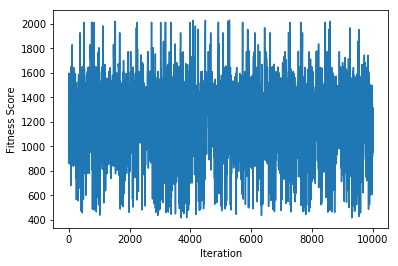

2028.018886338286 ([43, 84, 175, 46, 43], 2028.018886338286, [957.2133986188851, 3.269621133338811])


NameError: name 'progess' is not defined

In [140]:
simulated_annealing_plot(budget, tour_length, SF_sites, travel_matrix, temperature=100, stopping_temperature=0.00000001, max_iterations=10000, alpha=0.995)